# CSCI 381: Applied Data Science: Quiz 1

Mauricio Monje
June 10, 2025

## Data Summary

In this section, we summarize the diamonds dataset, including the number of use cases (number of records), the number of attributes, and the data types for each attribute. The dataset is loaded directly from my Github repository.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_url = "https://github.com/mmonj/CSCI-381-Applied-Data-Science/raw/refs/heads/main/quiz1/data/diamonds.csv"
df_original = pd.read_csv(data_url, index_col=0)

df_diamonds = df_original.drop_duplicates()

print(f"Dropped {df_original.shape[0] - df_diamonds.shape[0]} duplicates")

num_use_cases, num_attributes_per_use_case = df_diamonds.shape
print(f"Total number of use cases: {num_use_cases}")
print(f"Number of attributes per use case: {num_attributes_per_use_case}")

print("\nData types of the attributes:")
print(df_diamonds.dtypes)

print("\nFirst 5 rows of dataframe:")
print(df_diamonds.head())

Dropped 146 duplicates
Total number of use cases: 53794
Number of attributes per use case: 10

Data types of the attributes:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

First 5 rows of dataframe:
   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


**Summary:**
- The dataset contains over 50,000 diamond records, each with several attributes such as carat, cut, color, clarity, depth, table, price, and dimensions (x, y, z)
- Data types are a mix of numeric (e.g., carat, price) and categorical (e.g., cut, color, clarity) variables.

## Exploratory Data Analysis (EDA)

- Numeric variables (carat, depth, table, price, x, y, z) are analyzed with histograms and boxplots to understand distribution, skewness, and detect outliers
- Categorical variables (cut, color, clarity) are analyzed with count plots to understand category distribution and with boxplots of price to examine relationship to value.

In [2]:
print("Summary statistics for numeric attributes:")
df_diamonds.describe()

Summary statistics for numeric attributes:


,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Numeric Variable Analysis

For each numeric attribute, we present histograms and boxplots using both Matplotlib and Seaborn to visualize distributions and identify outliers.

- **Histograms** were used here for the diamonds dataset because we want to see how things like carat, price, and dimensions are distributed. For example, we can quickly see if most diamonds are small or if there are a lot of expensive ones. This helps us understand if the data is skewed or if there are common value ranges.
- **Boxplots** are useful here because the diamonds dataset can have outliers (like a few very large or expensive diamonds). Boxplots make it easy to spot these outliers and compare the spread and center of each numeric attribute, which is important for understanding the variety in diamond characteristics.
- Using both Matplotlib and Seaborn lets us double-check our findings and see the data in different styles, which can help to discern patterns.

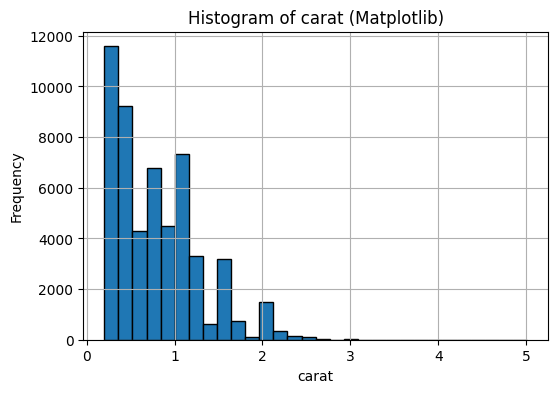

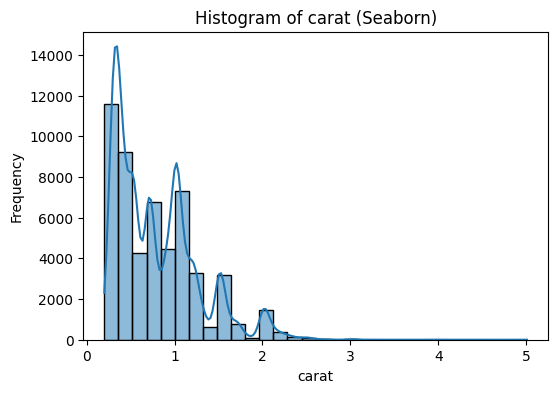

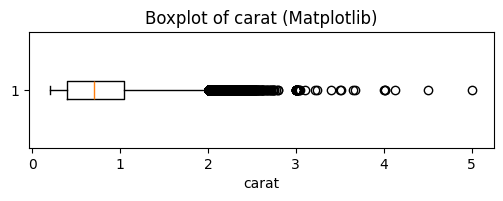

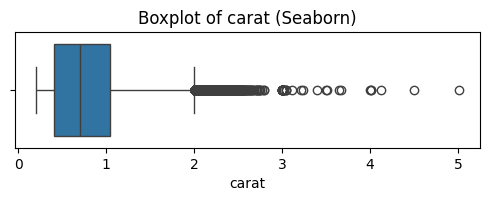

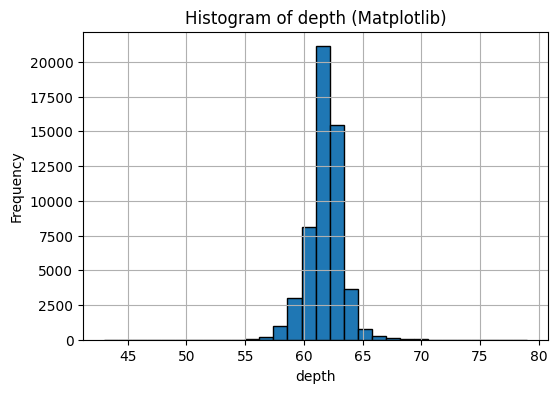

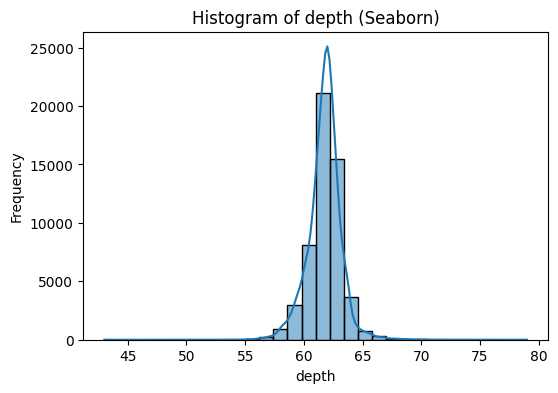

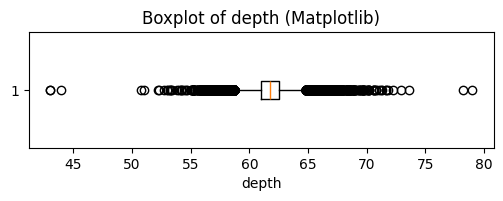

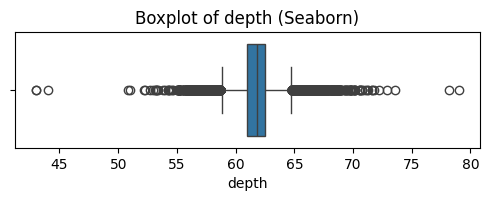

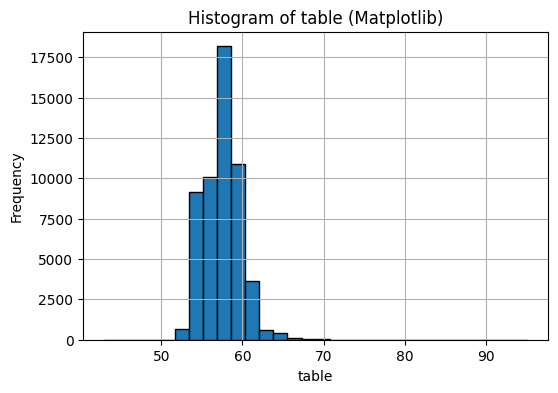

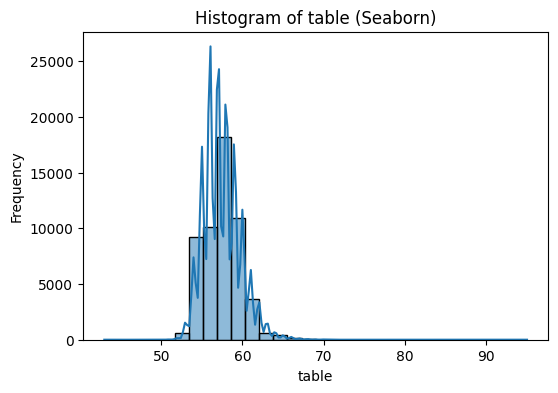

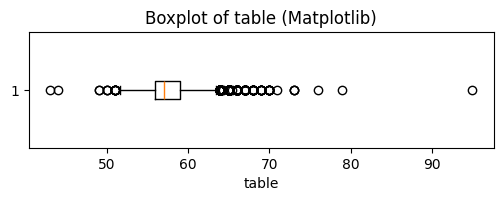

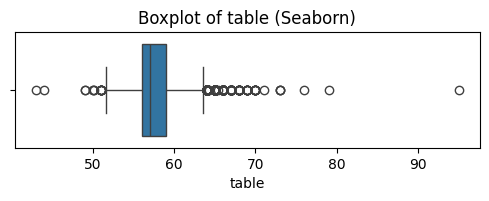

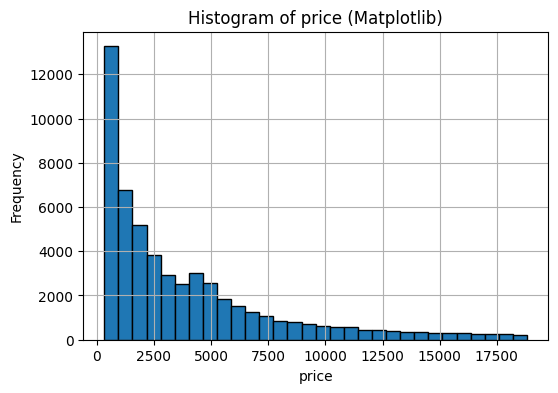

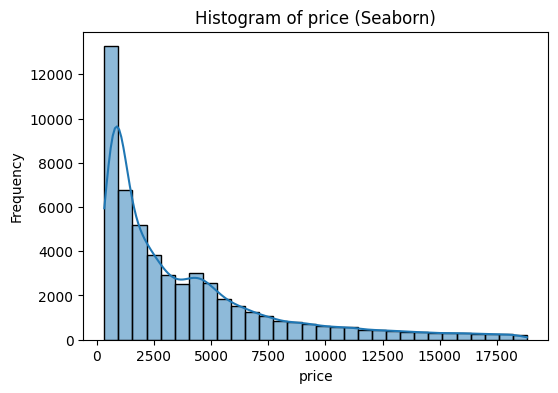

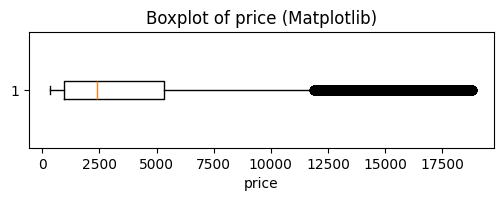

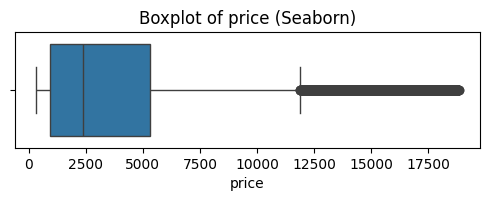

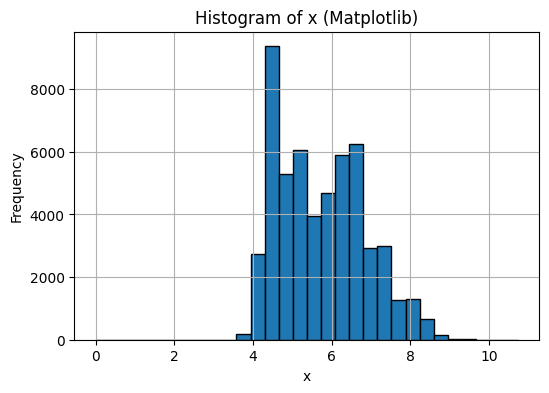

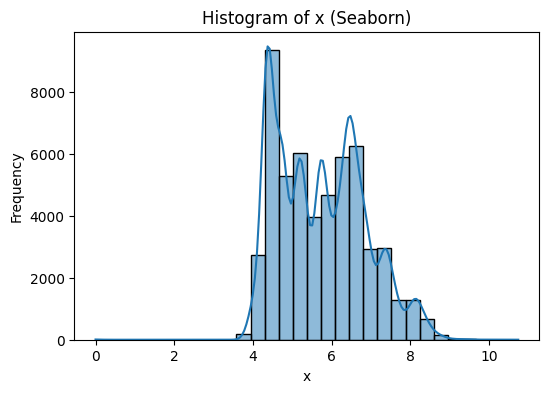

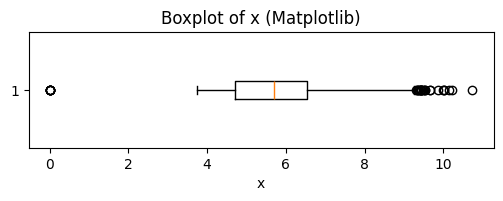

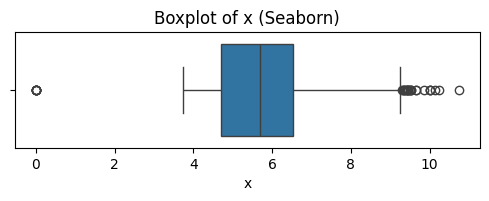

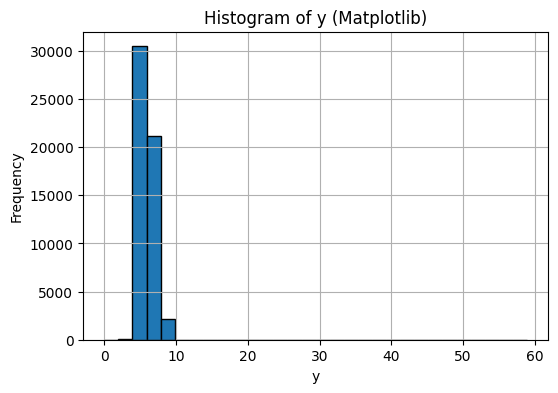

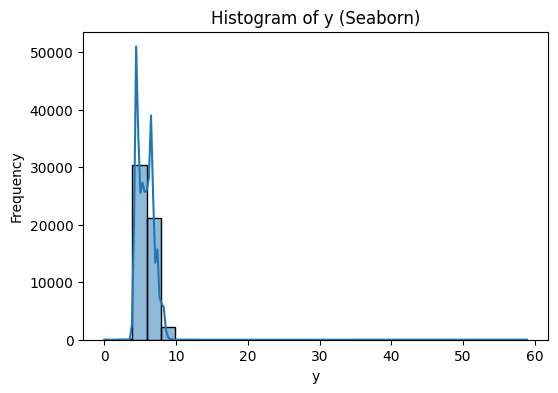

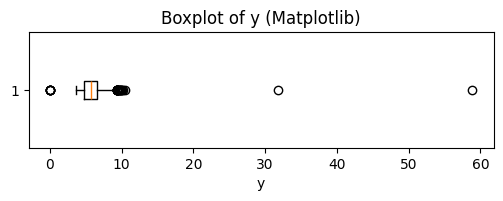

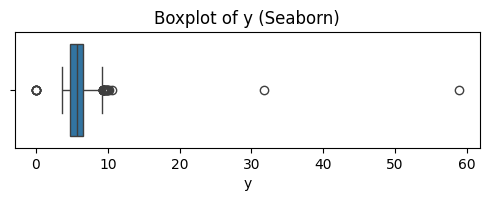

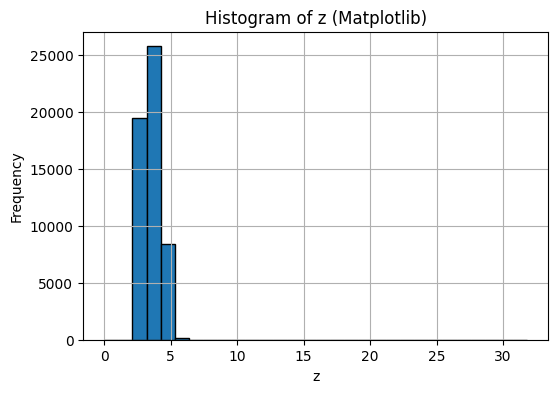

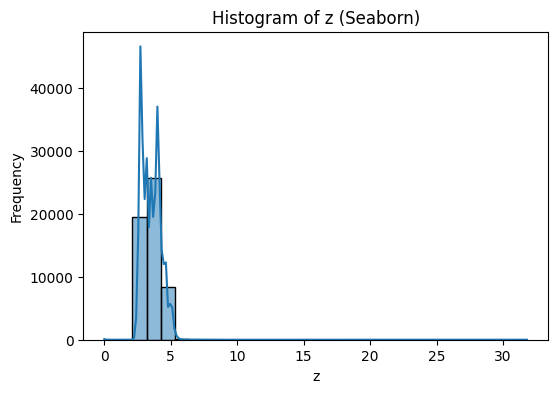

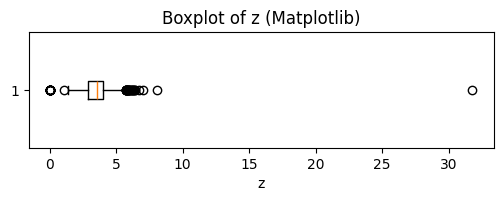

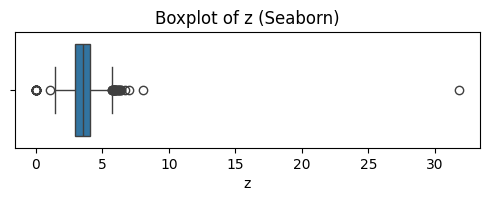

In [3]:
attributes = ["carat", "depth", "table", "price", "x", "y", "z"]

for attr in attributes:
    # histogram matploylib
    plt.figure(figsize=(6, 4))
    plt.hist(df_diamonds[attr], bins=30, edgecolor="black")
    plt.title(f"Histogram of {attr} (Matplotlib)")
    plt.xlabel(attr)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # histogram seaborn
    plt.figure(figsize=(6, 4))
    sns.histplot(df_diamonds[attr], bins=30, kde=True)
    plt.title(f"Histogram of {attr} (Seaborn)")
    plt.xlabel(attr)
    plt.ylabel("Frequency")
    plt.show()

    # boxplot matplotlib
    plt.figure(figsize=(6, 1.5))
    plt.boxplot(df_diamonds[attr], vert=False)
    plt.title(f"Boxplot of {attr} (Matplotlib)")
    plt.xlabel(attr)
    plt.show()

    # boxplot seaborn
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_diamonds[attr])
    plt.title(f"Boxplot of {attr} (Seaborn)")
    plt.xlabel(attr)
    plt.show()

### Categorical Variable Analysis

For each categorical attribute, we present bar charts and count plots to visualize category frequencies, and boxplots of price by category to explore relationships with price.

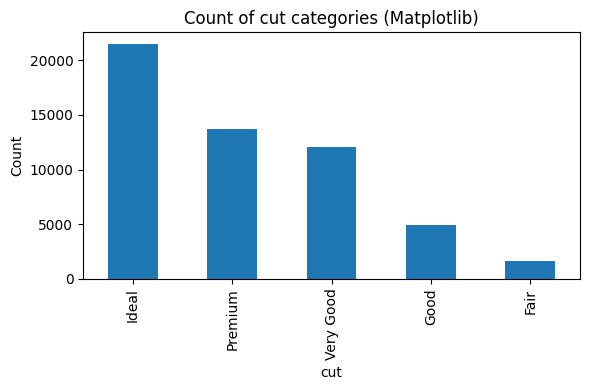

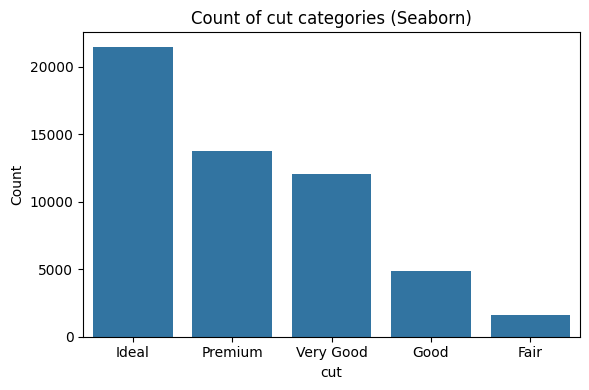

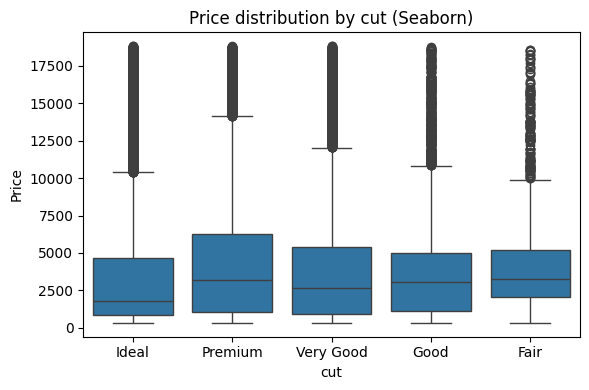

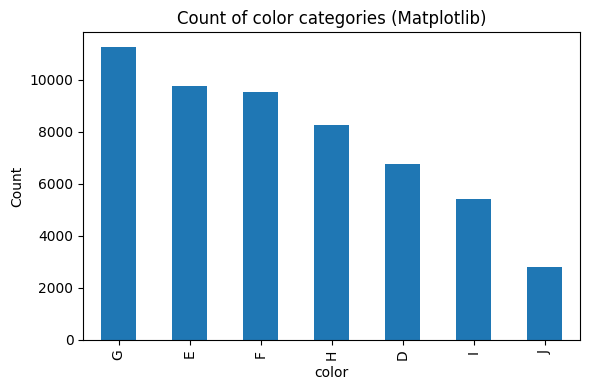

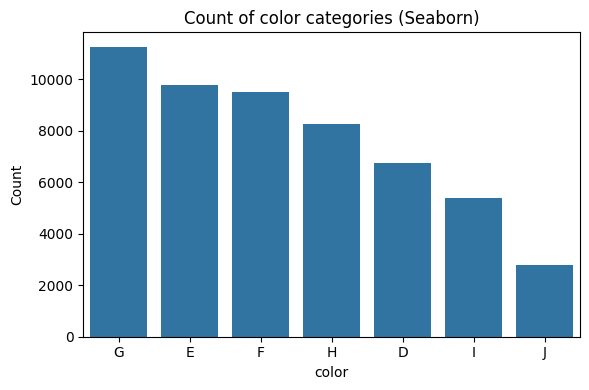

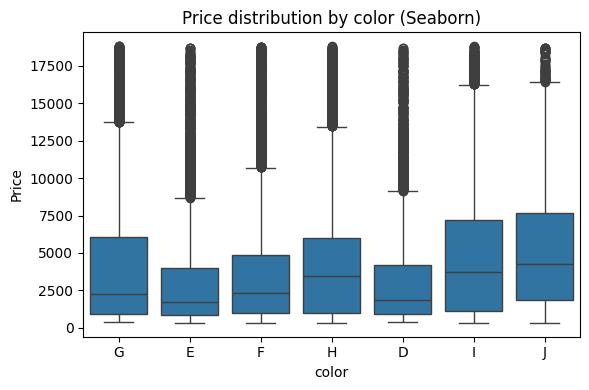

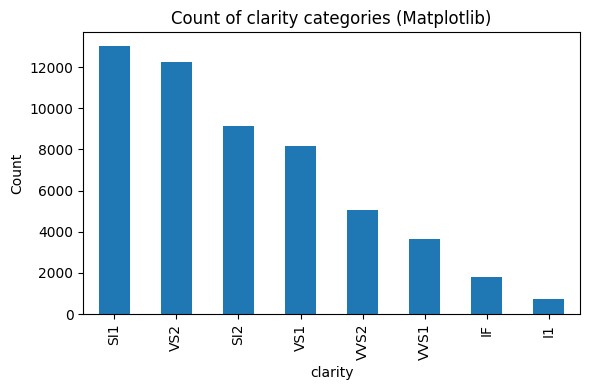

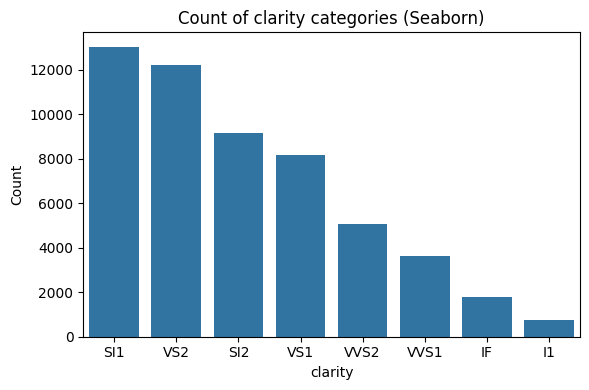

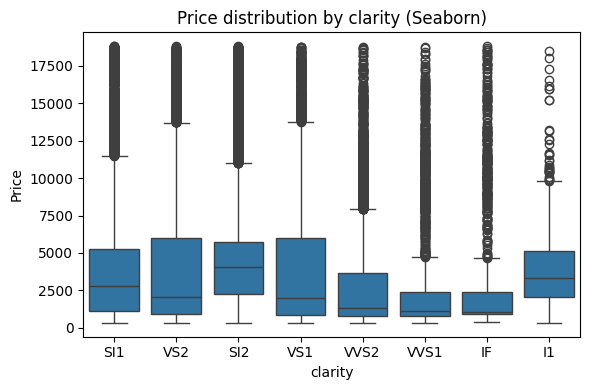

In [4]:
attributes = ["cut", "color", "clarity"]

for attr in attributes:
    # bar chart matplotlib
    plt.figure(figsize=(6, 4))
    df_diamonds[attr].value_counts().plot(kind="bar")
    plt.title(f"Count of {attr} categories (Matplotlib)")
    plt.xlabel(attr)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # countplot seaborn
    plt.figure(figsize=(6, 4))
    sns.countplot(x=attr, data=df_diamonds, order=df_diamonds[attr].value_counts().index)
    plt.title(f"Count of {attr} categories (Seaborn)")
    plt.xlabel(attr)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # boxplot of price by category with Seaborn
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=attr, y="price", data=df_diamonds, order=df_diamonds[attr].value_counts().index)
    plt.title(f"Price distribution by {attr} (Seaborn)")
    plt.xlabel(attr)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

**Findings:**
- 'carat' and 'price' are right-skewed; most diamonds are small and inexpensive, but a few large/expensive ones increase the spread
- 'depth' and 'table' are roughly normally distributed.
- 'x', 'y', 'z' follow similar patterns as 'carat' but include outliers.
- Categorical features like 'cut', 'color', and 'clarity' show uneven class distributions (e.g., 'Ideal' cut is most common).
- Price increases generally with better clarity and color, but variation is significant.

## Inferences

### 1. What proportion of diamonds are between 0.30 and 1.08 carats?

In [5]:
lower = 0.30
upper = 1.08

count_in_range = df_diamonds[(df_diamonds["carat"] >= lower) & (df_diamonds["carat"] <= upper)].shape[0]
proportion = count_in_range / df_diamonds.shape[0]

print(f"Number in range: {count_in_range}")
print(f"Proportion in range: {proportion}")

Number in range: 40180
Proportion in range: 0.7469234487117522


### 2. How many of the diamonds have equal x and y dimensions?

In [6]:
result = df_diamonds[df_diamonds["x"] == df_diamonds["y"]]
print(f"Diamonds with x == y: {result.shape[0]}")

Diamonds with x == y: 16


### 3. How many of the diamonds have a carat value less than the mean carat value?

In [7]:
mean_carat = df_diamonds["carat"].mean()
below_mean = df_diamonds[df_diamonds["carat"] < mean_carat].shape[0]
print(f"Mean carat: {mean_carat:.3f}")
print(f"Diamonds with carat < mean: {below_mean}")

Mean carat: 0.798
Diamonds with carat < mean: 31039


### 4. How many diamonds have a Premium cut or better?

In [8]:
premium_or_better = df_diamonds[df_diamonds["cut"].isin(["Premium", "Ideal"])]
print(f"Diamonds with Premium cut or better: {premium_or_better.shape[0]}")

Diamonds with Premium cut or better: 35236


### 5. Which diamond has the highest price per carat? What is its value?

In [9]:
df_diamonds["price_per_carat"] = df_diamonds["price"] / df_diamonds["carat"]
idx_max = df_diamonds["price_per_carat"].idxmax()
max_row = df_diamonds.loc[idx_max]
print("Diamond with highest price per carat:")
print(max_row)
print(f"Highest price per carat: {max_row['price_per_carat']:.2f}")

Diamond with highest price per carat:
carat                      1.04
cut                   Very Good
color                         D
clarity                      IF
depth                      61.3
table                      56.0
price                     18542
x                          6.53
y                          6.55
z                          4.01
price_per_carat    17828.846154
Name: 27636, dtype: object
Highest price per carat: 17828.85


C:\Users\Mauri\AppData\Local\Temp\ipykernel_17220\1063706979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diamonds["price_per_carat"] = df_diamonds["price"] / df_diamonds["carat"]


### 6. Boxplots of diamond price for each cut (Matplotlib and Seaborn)

<Figure size 800x500 with 0 Axes>

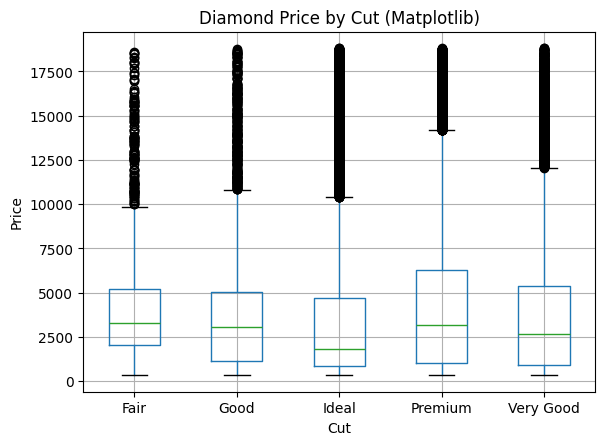

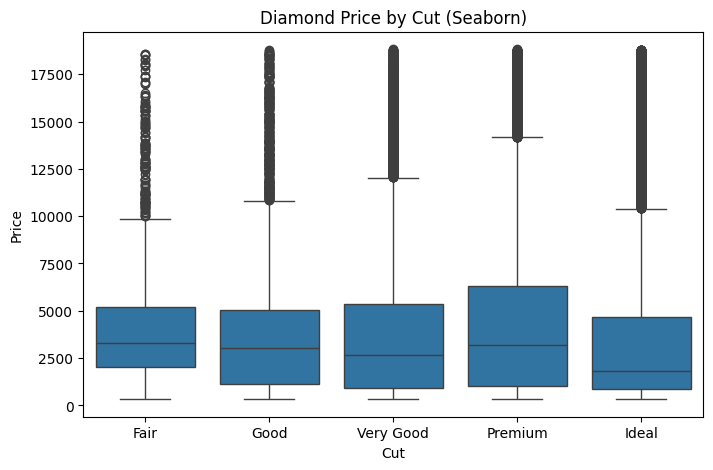

In [10]:
# boxplot by cut with matplotlib
plt.figure(figsize=(8, 5))
df_diamonds.boxplot(column="price", by="cut")
plt.title("Diamond Price by Cut (Matplotlib)")
plt.suptitle("")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

# boxplot by cut using seaborn.
plt.figure(figsize=(8, 5))
sns.boxplot(x="cut", y="price", data=df_diamonds, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.title("Diamond Price by Cut (Seaborn)")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

Boxplots show that Ideal and Premium cuts have a wide range of prices, but the median price is not always highest for the best cut. Outliers occur in all categories and price variation is significant within each cut.

### 7. Scatter plot of price vs. carat

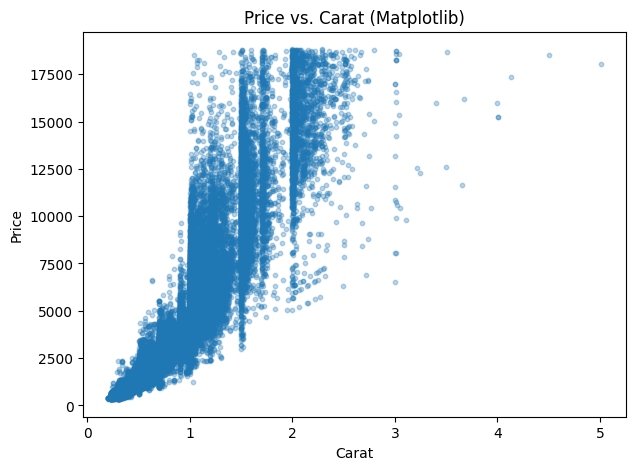

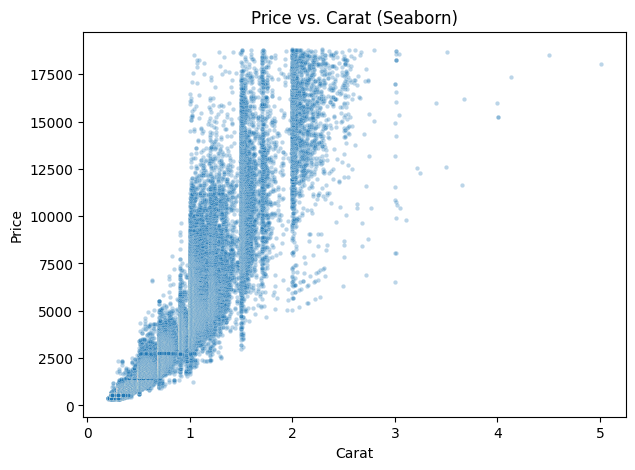

In [11]:
# scatter plot price vs. carat with matploblib
plt.figure(figsize=(7, 5))
plt.scatter(df_diamonds["carat"], df_diamonds["price"], alpha=0.3, s=10)
plt.title("Price vs. Carat (Matplotlib)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

# scatter plot price vs. carat with seaborn
plt.figure(figsize=(7, 5))
sns.scatterplot(x="carat", y="price", data=df_diamonds, alpha=0.3, s=10)
plt.title("Price vs. Carat (Seaborn)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

There is a strong positive relationship between carat and price, but the relationship is nonlinear. Price increases rapidly for larger carats, and there is a large spread at each carat value.

## Conclusion

In this project, we explored the diamonds dataset by summarizing the data, creating visualizations, and answering specific questions about the diamonds. Most diamonds in the dataset are small and not very expensive, and we saw that as carat increases, price usually goes up as well, but in a non-linear fashion - bigger diamonds can be much more expensive. The cut, color, and clarity of a diamond also affect its price, but having the best cut doesn't always mean the highest price. We also noticed some odd data points, like diamonds with zero for some dimensions, which likely means there were mistakes when the data was collected. Overall, the dataset gives a comprehensive overview of how different features relate to diamond prices.

## References

- [ggplot2 diamonds documentation](https://ggplot2.tidyverse.org/reference/diamonds.html) - for attribute definitions, expected value ranges, and dataset context.
- [GIA 4Cs of Diamond Quality](https://www.gia.edu/diamond-quality-factor) - for understanding carat, cut, color, and clarity grading standards and impacts on value
